C:\Users\Manish Kumar Gupta\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Manish Kumar Gupta\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Manish Kumar Gupta\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Manish Kumar Gupta\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.
C:\Users\Manish Kumar Gupta\AppData\Local\Temp\ipykernel_4300\1640577755.py:38: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Manish Kumar Gupta\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


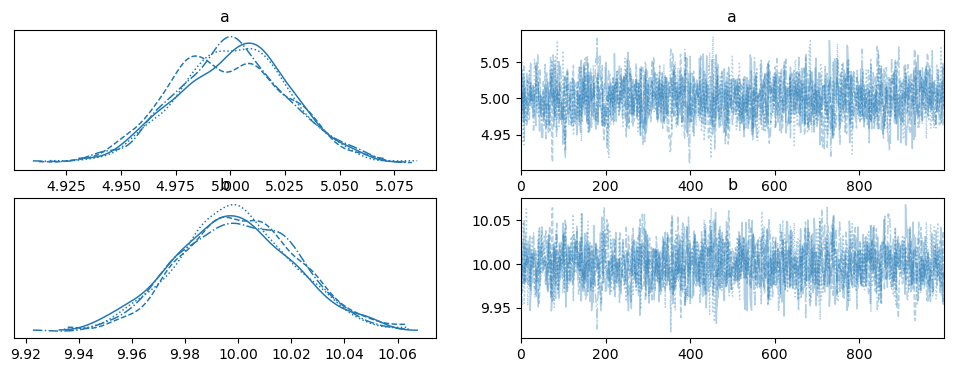

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Manish Kumar Gupta\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\Manish Kumar Gupta\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [3]:
# this is an eexample of multivariable linear regression using bayesian inference

import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import pymc3 as pm


# Define synthetic data (N and P time series)
X1=np.arange(0,20,1)+np.random.normal(0,10,20)
X2=np.arange(0,20,1)+np.random.normal(0,10,20)

#paramter
a=5;b=10
#observation
Y_obs=a*X1+b*X2


# task: given X1,X2 and the Y_obs, determine the a and b

# Define the priors for model parameters
with pm.Model() as model:
    a1 = pm.Normal("a", mu=1, sd=10)  # Prior for a
    b1 = pm.Normal("b", mu=1, sd=10)  # Prior for b
    
    # Likelihood function (observation model)
    Y_pred = pm.Normal("Y_pred", mu=a1*X1+b1*X2, sd=1, observed=Y_obs)


with model:
    trace = pm.sample(1000, tune=1000, cores=4)
    
    
pm.traceplot(trace)
plt.show()

pm.summary(trace)

# Plot posterior predictive checks
ppc = pm.sample_posterior_predictive(trace, samples=500, model=model)


    